In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score, KFold
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve, confusion_matrix, precision_recall_curve, ConfusionMatrixDisplay

In [3]:
strokes = pd.read_csv('Stroke.csv')

In [4]:
strokes

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [5]:
strokes.drop('id', inplace = True, axis = 1)

In [6]:
strokes

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [7]:
strokes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [8]:
strokes.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [9]:
strokes.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [10]:
strokes.dropna(subset=['bmi'], inplace=True)

In [11]:
strokes.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

Text(0.5, 1.0, 'Count of Stroke Patients')

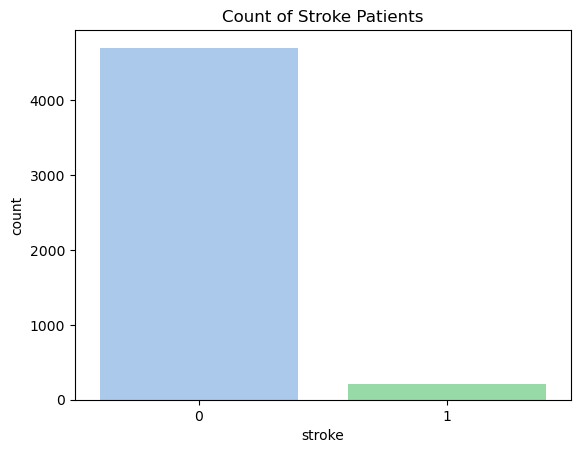

In [12]:
sns.countplot(x ='stroke', data = strokes, palette='pastel6')
plt.title('Count of Stroke Patients')

Text(0.5, 1.0, 'Stroke patients by Gender')

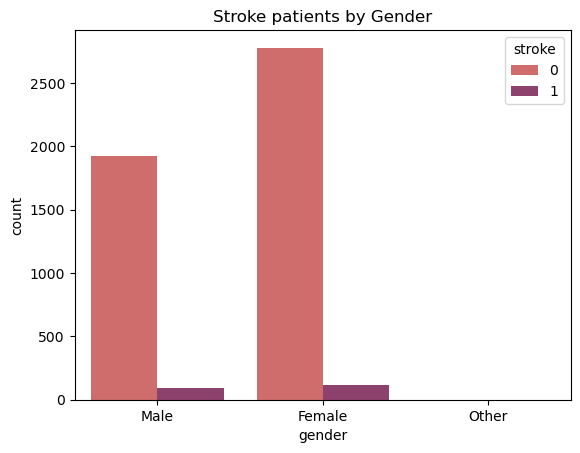

In [13]:
sns.countplot(x='gender', hue='stroke', data=strokes, palette='flare')
plt.title('Stroke patients by Gender')

<Axes: xlabel='age', ylabel='stroke'>

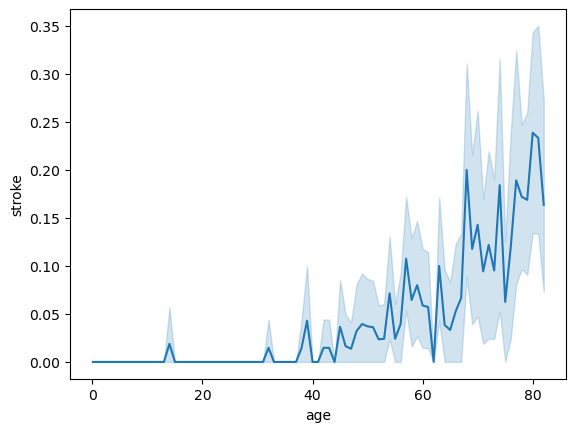

In [14]:
sns.lineplot(data=strokes, x='age', y="stroke")

<Axes: xlabel='bmi', ylabel='Count'>

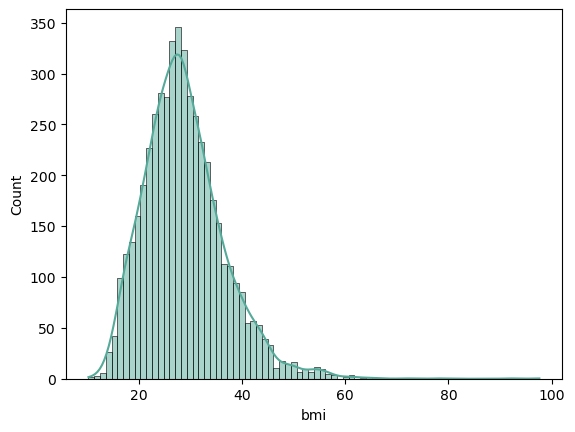

In [15]:
sns.histplot(data=strokes, x='bmi', kde=True, color= '#5A9')

In [16]:
strokes.nunique()

gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3852
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

In [17]:
strokes.drop('work_type', inplace = True, axis = 1)

In [18]:
strokes

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Urban,228.69,36.6,formerly smoked,1
2,Male,80.0,0,1,Yes,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Yes,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...
5104,Female,13.0,0,0,No,Rural,103.08,18.6,Unknown,0
5106,Female,81.0,0,0,Yes,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Rural,166.29,25.6,formerly smoked,0


In [19]:
strokes = strokes[strokes['smoking_status'] != 'Unknown']

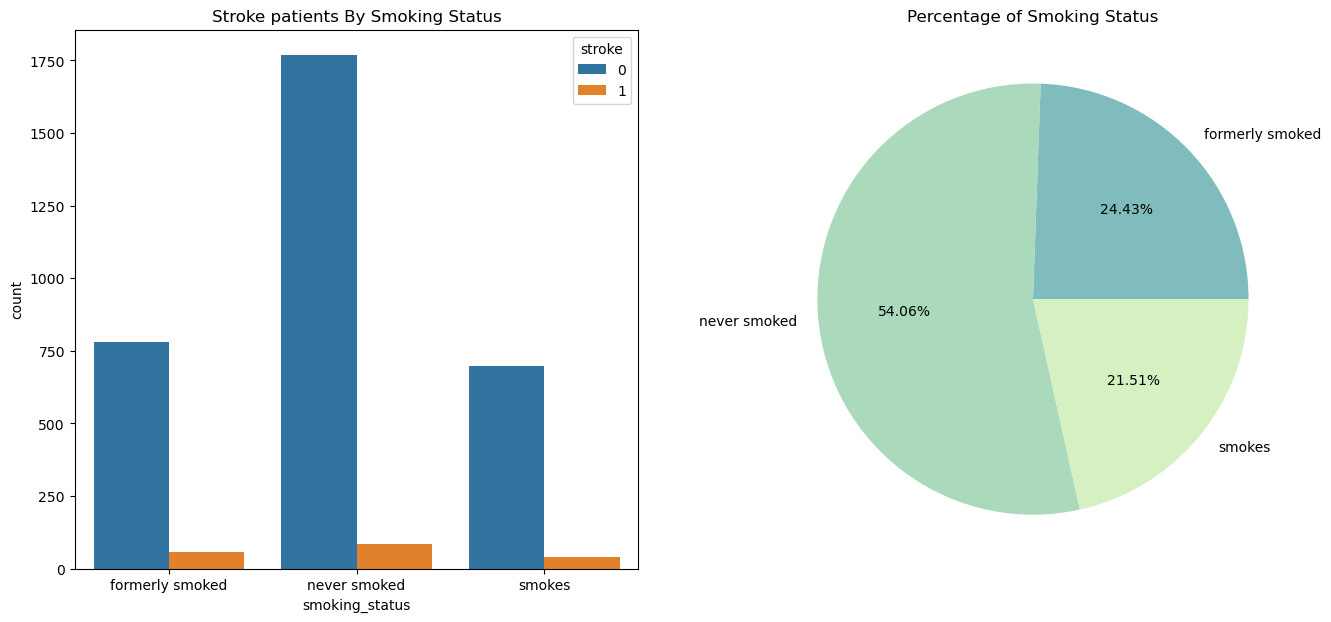

In [20]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 7))
sns.countplot(x='smoking_status', hue='stroke', data=strokes, ax=axes[0]).set_title("Stroke patients By Smoking Status")

smoke = strokes.groupby('smoking_status')['smoking_status'].count()
plt.pie(smoke, labels=smoke.index, autopct="%.2f%%", colors=['#80BCBD', '#AAD9BB', '#D5F0C1', '#F9F7C9', "#77BFE2"])
plt.title("Percentage of Smoking Status")

plt.show()

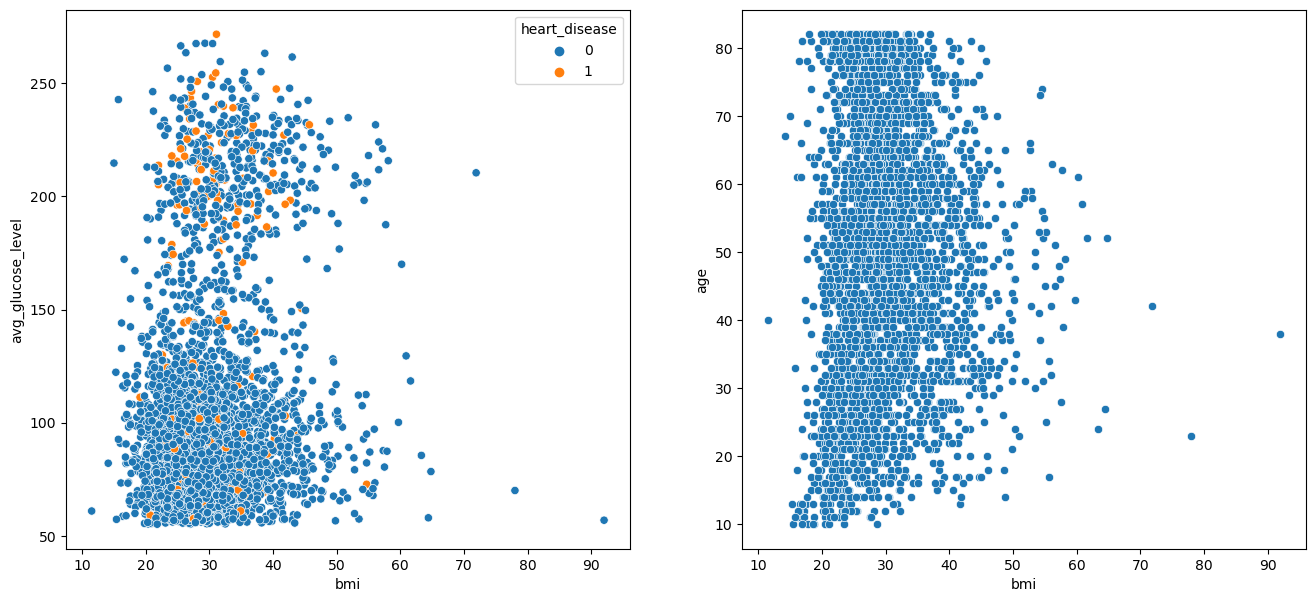

In [21]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 7))
 
sns.scatterplot(data=strokes, x='bmi', y='avg_glucose_level', hue = 'heart_disease', ax=axes[0])

sns.scatterplot(data=strokes, x='bmi', y='age', ax=axes[1])

plt.show()

In [22]:
stg_cols = ['gender', 'ever_married', 'Residence_type', 'smoking_status']

encoder = OneHotEncoder(drop = 'first', sparse = False)
encoded_cols = pd.DataFrame(encoder.fit_transform(strokes[stg_cols]), columns = encoder.get_feature_names_out(stg_cols))

In [23]:
stand_cols = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']

selected_data = strokes[stand_cols]

scaler = StandardScaler()

scaler_cols = pd.DataFrame(scaler.fit_transform(selected_data), columns=stand_cols)

In [24]:
x = pd.concat([encoded_cols, scaler_cols], axis =1)
y = strokes['stroke']

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 42)

In [26]:
log = LogisticRegression()

log.fit(x_train,y_train)

print(f"Training Score : {log.score(x_train,y_train)}")
print(f"Testing Score : {log.score(x_test,y_test)}")

Training Score : 0.9507299270072993
Testing Score : 0.9358600583090378


In [27]:
y_pred = log.predict(x_test)

In [28]:
metrics = accuracy_score(y_test, y_pred)
print("Accuracy : ", accuracy_score(y_test, y_pred))

Accuracy :  0.9358600583090378


In [29]:
acc = classification_report(y_test, y_pred)
print(acc)

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       642
           1       0.00      0.00      0.00        44

    accuracy                           0.94       686
   macro avg       0.47      0.50      0.48       686
weighted avg       0.88      0.94      0.90       686



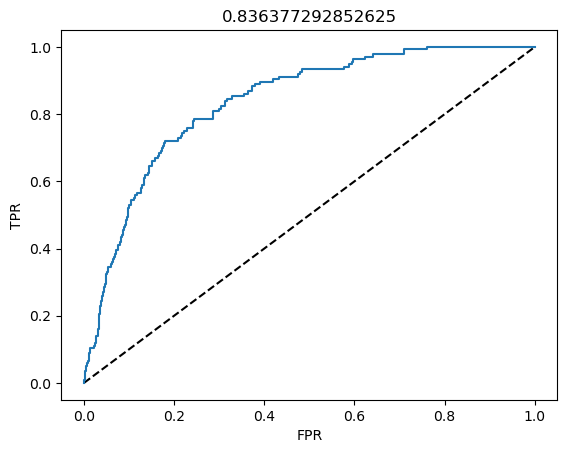

In [30]:
probab=log.predict_proba(x_train)[:,1]

fpr,tpr,threshold=roc_curve(y_train,probab)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title(roc_auc_score(y_train,probab))
plt.show()

# GridSearch CV

In [31]:
param_grid = {'penalty': ['l1', 'l2'], 'C': [0.1, 0.5, 1, 5, 10]}
grid_search = GridSearchCV(estimator=log, param_grid=param_grid, cv=5)

In [32]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 0.5, 1, 5, 10], 'penalty': ['l1', 'l2']})

In [33]:
best_param = grid_search.best_params_
best_model = grid_search.best_estimator_

In [34]:
y_pred = best_model.predict(x_test)

In [35]:
accu = accuracy_score(y_test, y_pred)
print('Accuracy:', accu)

roc_auc = roc_auc_score(y_test, y_pred)
print('roc_auc:', roc_auc)

Accuracy: 0.9358600583090378
roc_auc: 0.5


In [36]:
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'C': 0.1, 'penalty': 'l2'}


# RandomizedSearch CV

In [37]:
random_search = RandomizedSearchCV(estimator=log, param_distributions=param_grid, cv=5, random_state=42)
random_search.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'C': [0.1, 0.5, 1, 5, 10],
                                        'penalty': ['l1', 'l2']},
                   random_state=42)

In [38]:
better_param = random_search.best_params_
better_model = random_search.best_estimator_

In [39]:
y_pred = better_model.predict(x_test)

In [40]:
accu = accuracy_score(y_test, y_pred)
print('Accuracy:', accu)

roc_auc = roc_auc_score(y_test, y_pred)
print('roc_auc:', roc_auc)

Accuracy: 0.9358600583090378
roc_auc: 0.5


# Confusion Matrix

In [41]:
confusion_matrix = confusion_matrix(y_test, y_pred)

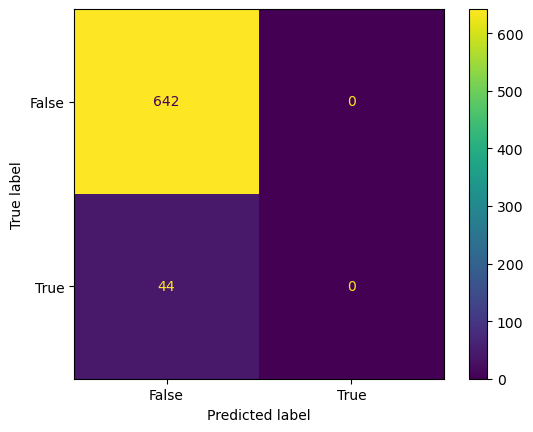

In [42]:
plot_cm = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

plot_cm.plot()
plt.show()

# Precision Recall Curve

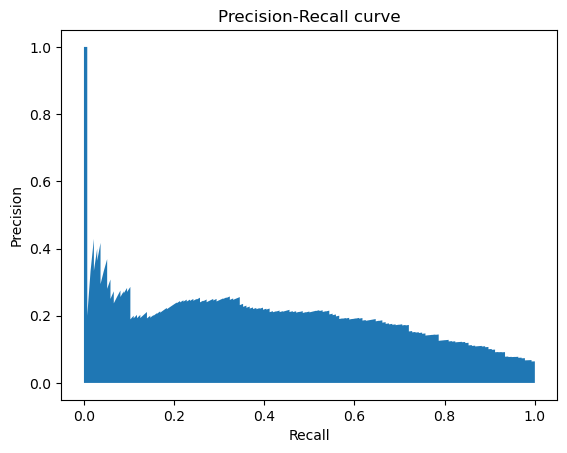

In [43]:
precision, recall, thresholds = precision_recall_curve(y_train, probab)
plt.fill_between(recall, precision)
plt.ylabel("Precision")
plt.xlabel("Recall")
plt.title("Precision-Recall curve");

# Cross Validation Score

In [44]:
clf = DecisionTreeClassifier(random_state=42)

In [45]:
k_folds = KFold(n_splits = 5)

In [46]:
scores = cross_val_score(clf, x,y, cv = k_folds)
print("Cross Validation Scores: ", scores)

Cross Validation Scores:  [0.73760933 0.92846715 0.92846715 0.93722628 0.92262774]


# Cross Validation Score 

In [47]:
print("Cross Validation score:", cross_val_score(better_model, x, y, cv=3))

Cross Validation score: [0.9474606  0.9474606  0.94921191]
